In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import truncnorm

In [29]:
def generate_timeseries(length, with_sin=False, sin_noise=False, randomize_sin_height=False):
    SIN_LENGTH_RATIO = 0.2
    timeseries = np.random.normal(0, 100, length)

    if with_sin:
        sin_length = int(length*SIN_LENGTH_RATIO)

        ## todo - mudar height para normal
        sin_height_adjust = random.uniform(-200, 200) if randomize_sin_height else 0

        ## todo - calcular desvio padrao
        sin_noise = np.random.normal(-5, 5, sin_length) if sin_noise else 0
            
        # Generate a sine wave
        t = np.linspace(0, 4*np.pi, sin_length)
        sine_wave = 30 * np.sin(t) + sin_noise
        sine_wave += sin_height_adjust
        patch_start = np.random.randint(0, length - len(t))
        patch_end = patch_start + len(t)
        timeseries[patch_start:patch_end] = sine_wave

        ## colocar metadata x,y

    
        
    return timeseries

In [30]:
def get_truncated_normal(len, mean=0.5, sd=.2, low=0, upp=1):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd).rvs(len)

In [31]:
def generate_dataset(ts_len, total, sin_n, sin_noise, randomize_sin_height=False):
    random_timeseries = [
        generate_timeseries(ts_len)
        for _ in range(total-sin_n)
    ]

    synthetic_error = get_truncated_normal(len=total-sin_n, mean=0.5, sd=0.1, low=0, upp=1)
    random_labels = np.c_[ synthetic_error, np.full((total-sin_n,), False) ]
    random_data = np.c_[ np.array(random_timeseries), random_labels] 
    
    sine_patch_timeseries = [
        generate_timeseries(ts_len, with_sin=True, sin_noise=sin_noise, randomize_sin_height=randomize_sin_height) 
        for _ in range(sin_n)
    ]

    sine_synth_error = get_truncated_normal(len=sin_n, mean=0.9, sd=0.05, low=0, upp=1)
    sine_labels = np.c_[ sine_synth_error, np.full((sin_n,), True) ]
    sine_data = np.c_[ np.array(sine_patch_timeseries), sine_labels ] 

    full_data = np.r_[ random_data, sine_data ]
    columns = list(range(0, ts_len)) + ['error', 'label']
    return pd.DataFrame(full_data, columns=columns)

In [32]:
def plot_random_series_helper(df):
    random_row = df.sample()
    datapoints = random_row.drop(columns=['label', 'error'])
    plt.plot(datapoints.values.flatten())
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

In [33]:
def plot_error_distributions(df):
    bins = np.linspace(0, 1, 50)
    plt.hist(df[df['label']==0]['error'], bins, alpha=0.5, label='sin=false')
    plt.hist(df[df['label']==1]['error'], bins, alpha=0.5, label='sin=true')
    plt.legend(loc='upper right')
    plt.show()

### FIXED-Y, NO NOISE
200 series, half with sin

In [34]:
df_no_noise = generate_dataset(ts_len=150, total=500, sin_n=250, sin_noise=False)

In [35]:
df_no_noise.head(3)

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,error,label
0,85.739247,1.344625,37.451670,26.843315,31.284170,-45.399383,14.300533,81.977677,-187.995462,-21.960071,...,-24.578258,103.211914,-14.518547,84.652062,7.953025,-120.718118,37.572022,120.889874,0.544000,0.0
1,-207.671318,-75.968150,33.158166,-29.512768,-164.005766,-126.672726,39.776650,-95.709632,-16.328996,-55.559408,...,-95.788062,70.440149,13.288579,120.328714,137.852343,145.181942,106.631722,-115.018158,0.535469,0.0
2,-132.060832,-45.206333,20.068966,-108.144891,103.378844,-5.526240,9.712645,23.641079,-78.266041,-113.073336,...,150.030863,61.051841,-54.133299,84.737563,-27.710857,104.115506,-77.853640,-254.261817,0.466362,0.0


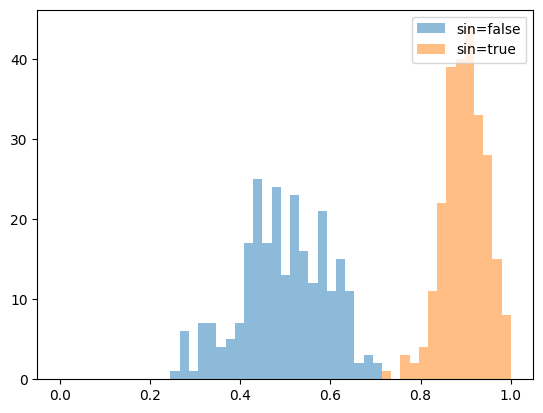

In [36]:
plot_error_distributions(df_no_noise)

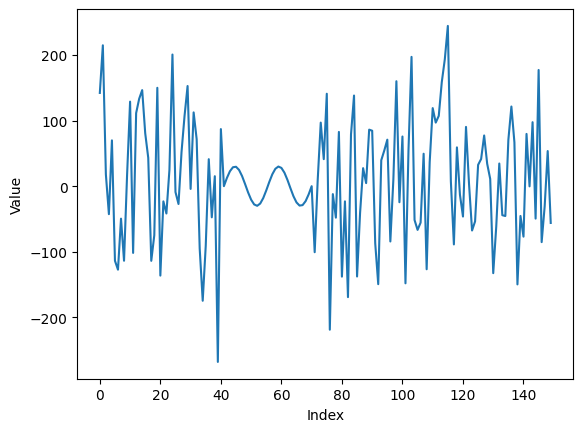

In [37]:
plot_random_series_helper(df=df_no_noise[df_no_noise['label']==1])

In [38]:
df_no_noise.to_csv('./sin_synth/SIN_FIXED_NONOISE_500.csv', index=False)

### FIXED-Y, WITH NOISE
200 series, half with sin

In [39]:
df_w_noise = generate_dataset(ts_len=150, total=500, sin_n=250, sin_noise=True)

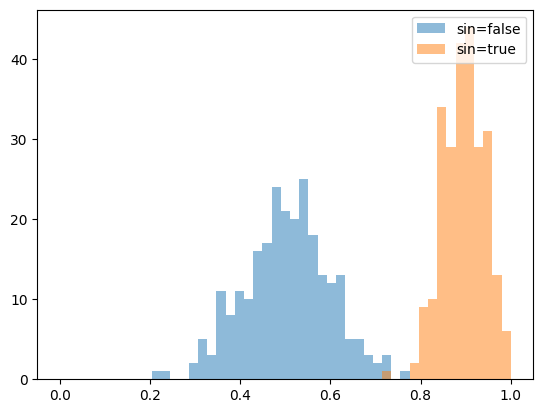

In [40]:
plot_error_distributions(df_w_noise)

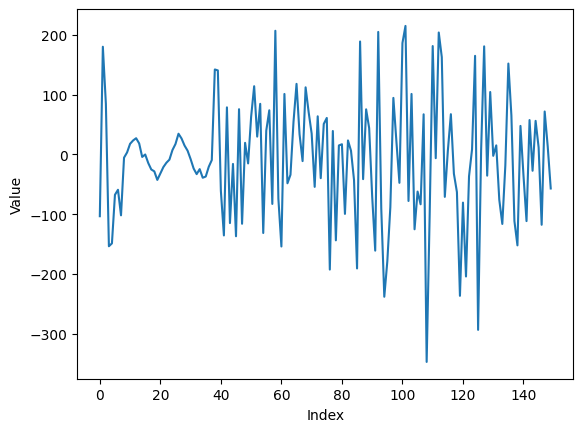

In [41]:
plot_random_series_helper(df=df_w_noise[df_w_noise['label']==1])

In [42]:
df_w_noise.to_csv('./sin_synth/SIN_FIXED_WITHNOISE_500.csv', index=False)

### RANDOMIZED-Y, NO NOISE
200 series, half with sin

In [43]:
df_randy_nonoise = generate_dataset(ts_len=150, total=500, sin_n=250, sin_noise=False, randomize_sin_height=True)

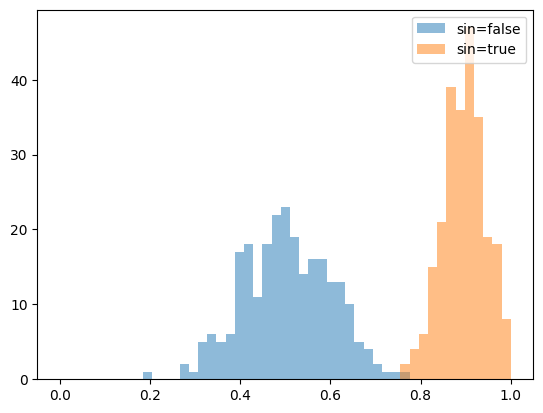

In [44]:
plot_error_distributions(df_randy_nonoise)

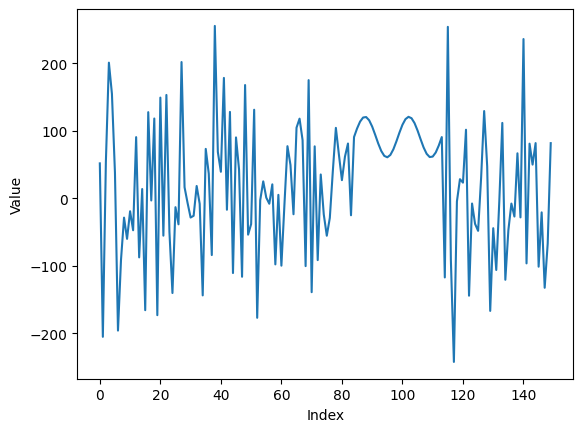

In [45]:
plot_random_series_helper(df=df_randy_nonoise[df_randy_nonoise['label']==1])

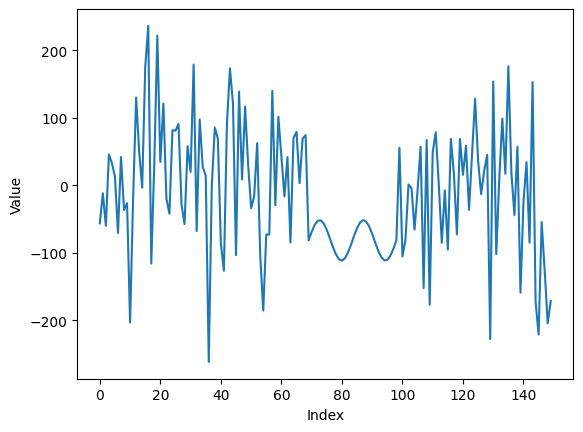

In [46]:
plot_random_series_helper(df=df_randy_nonoise[df_randy_nonoise['label']==1])

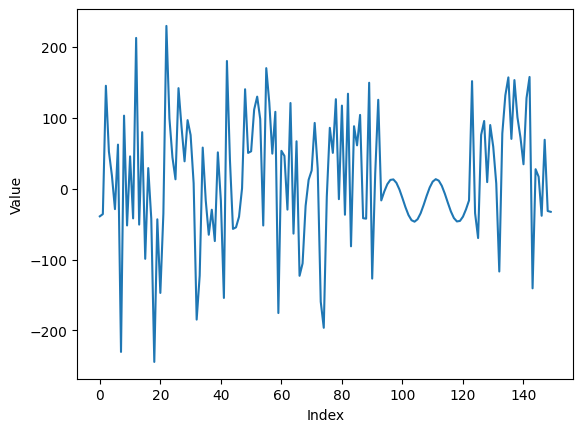

In [47]:
plot_random_series_helper(df=df_randy_nonoise[df_randy_nonoise['label']==1])

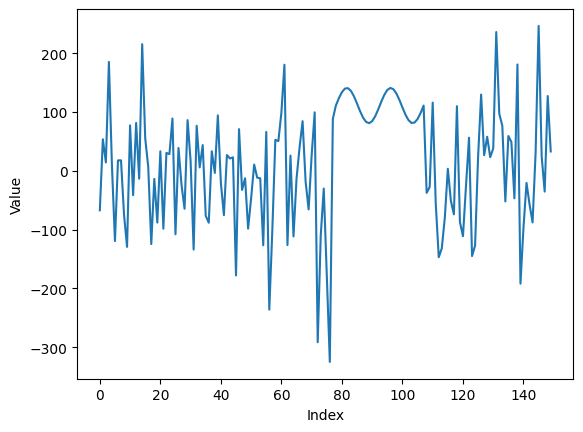

In [48]:
plot_random_series_helper(df=df_randy_nonoise[df_randy_nonoise['label']==1])

In [49]:
df_randy_nonoise.to_csv('./sin_synth/SIN_RANDY_NONOISE_500.csv', index=False)

### RANDOMIZED-Y, WITH NOISE
200 series, half with sin

In [50]:
df_randy_wnoise = generate_dataset(ts_len=150, total=500, sin_n=250, sin_noise=True, randomize_sin_height=True)

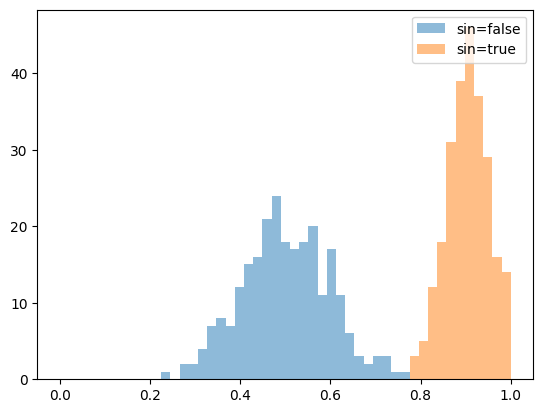

In [51]:
plot_error_distributions(df_randy_wnoise)

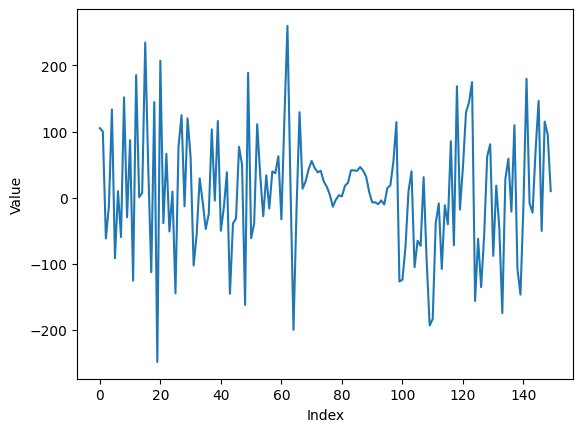

In [52]:
plot_random_series_helper(df=df_randy_wnoise[df_randy_wnoise['label']==1])

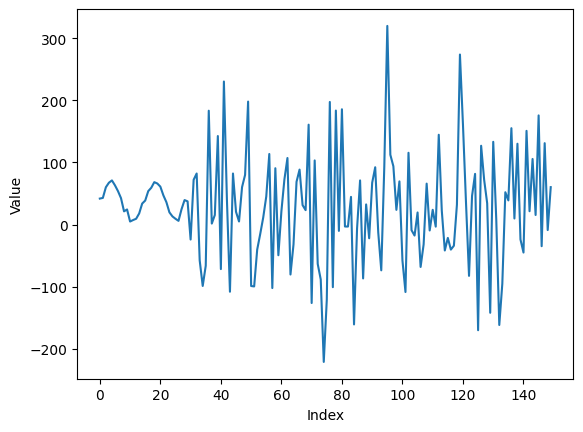

In [53]:
plot_random_series_helper(df=df_randy_wnoise[df_randy_wnoise['label']==1])

In [54]:
df_randy_wnoise.to_csv('./sin_synth/SIN_RANDY_WITHNOISE_500.csv', index=False)